## About the necessity of careful programming. 

**Note:** In this tutorial we will consider $m_o$  and  $\hat{\boldsymbol{\mu}}$ to be $(K \times 1)$ where $dim(\boldsymbol{\theta})  = K$


Two of the operations required by the Splines'n Lines method, for $o = 1,2,..., O$, are given by 

$$ C_o = (\hat{\Sigma}^{-1} + \textbf{X}_o^T \textbf{T}_o \textbf{X}_o  )^{-1} $$

$$m_o = C_o(\textbf{X}_o \textbf{T}_o \textbf{y}_o + \hat{\Sigma}^{-1} \hat{\boldsymbol{\mu}}) $$

$$\hat{ \Sigma } = \sum_{o =1}^{O} \Big(  C_o + m_om_o^T - \hat{\boldsymbol{\mu}}\hat{\boldsymbol{\mu}}^T  \Big)$$


Thus, in principle, one naive algorithm to obtain the $C_o$, $m_o$ and ultimately $\hat{\Sigma}^{-1}$ is the following 

1. **for** $o = 1,2,..., O$ **do:** 

    1.1 $C_o \gets (\hat{\Sigma}^{-1} + \textbf{X}_o^T \textbf{T}_o \textbf{X}_o  )^{-1}$ 

    2.1 $m_o \gets C_o(\textbf{X}_o \textbf{T}_o \textbf{y}_o + \hat{\Sigma}^{-1} \hat{\boldsymbol{\mu}}) $
2. $\hat{ \Sigma } \gets \sum_{o =1}^{O} \Big(  C_o + m_om_o^T - \hat{\boldsymbol{\mu}}\hat{\boldsymbol{\mu}}^T  \Big)$


In what follows we will explore some reasons for which implementing the previous algorithm and obtaining the components $C_o$, $m_o$ isnt as simple as it seems. 


### Memory usage in a computer and the power of numerical computin libraries. 

The purpose of the following videos is too illustrate the way that memory management works and, as a result, how can it affect algorithmic efficiency and 
execution time. 

Watch the following video up to the end of the Pointers section: https://www.youtube.com/watch?v=kcRdFGbzR1I&t=947s 
Watch the following video up to minute 40: https://www.youtube.com/watch?v=X8h4dq9Hzq8&t=1458s
Watch the following video  https://www.youtube.com/watch?v=QXjU9qTsYCc 

**Task: Matrix multiplication** Create a code that recieves two numpy np.ndarray type of objects $A$ and $B$, checks whether their dimensions match for multiplication and returns a third np.ndarray object $C$ whose entries equal to those of $AB$. 

You are **not** allowed to use the numpy commands/functions @, np.dot, A*B. 

You **are** allowed to use the function multiply\_vectors\_entrywise a and the np.sum function. Observe that A[i, :]@B[:, j] =np.sum( mutiply_vectors_entrywise(Af[i, :],Bf[:, j] )) where Af[i,:] and Bf[:,j] are the flattened versions of A[i, :] and B[:, j].


In [ ]:
import numpy as np 

"""
Hint: Remember you can check the dimensions of a np.ndarray with A.shape 
Note, some good practices: 
When coding, it is a good practice to document what it does. 

"""


"""
mutiply_vectors_entrywise 
recieves two numpy arrays a and b of equal length and returns a new numpy ndarray c with values a[i]*b[i]
"""

def multiply_vectors_entrywise(a,b):
    assert len(a) == len(b) #Checks whether the 
    c =  np.zeros(len(a)) #Creates new vector. 

    for i in range(len(c)):
        c[i] =   #Obtains i-th entry of c. 
    return c 



def multiply_matrices(A,B):
    assert (type(A) == np.ndarray) and (type(B) == np.ndarray), "Fatal error! either A or B arent of type np.ndarray" #Checks whether A and B are of type np.ndarray. 

    a_r, a_c = A.shape #Gets the dimensions of A (a_r x a_c)
    b_r, b_c = B.shape #Gets the dimensions of B (b_r x b_c)

    assert  a_c == b_r, "Fatal error!, columns of A dont match the rows of B" #Checks if columns of A (a_c) match the rows of B (b_r)
    C = np.zeros((a_r, b_c)) #Creates new np.ndarray of dimensions a_r x b_c 

    #This iterated loop obtains the entries of C (e.g. C[i,j]). 
    for i in range(a_r):
        for j in range(b_c):
            C[i,j] = #Multiples the row i of A times the column j of B

    return C 




In [ ]:
"""
One very important practice is to check whether your code is actually doing what you think it is doing. 
To do so, it is important to give it particular cases (to which you know the answers to) and check whether your 
code is capable of replicating them. 

"""

test_cases = 3
tol = 1e-10 #Gets tolerance for difference. 



np.random.seed(201763) #Tip: When dealing with computations which involve (semi)random number generations it is a good practice to 
                        #set a seed. This will ensure that, every time you run a single script, all of the random components remain the same. 
                        #This is essential for replicability in academic settings and for checking the results of your code. 


for t in range(test_cases):

    #Generates matrix dimensions at random, ensuring that they are capable of being multiplied. 
    a_r = np.random.randint( 2, 10 )
    a_c = np.random.randint( 2, 10)
    b_r = a_c 
    b_c =np.random.randint( 2, 10)

    #Generates matrices at random to being multiplied. 
    A = np.random.uniform(0, 20, size = (a_r, a_c)) #
    B = np.random.uniform(-10,10, size = (b_r, b_c))

    C = A@B 
    C_mine = multiply_matrices(A, B)
 
    if np.linalg.norm( C - C_mine )/a_r*b_c < tol: #Checks whether C and C_mine are sufficiently simila by taking their norm. 
        
        print(f"Test number {t} passed ! ")
    else:

        print(f"Test number {t} NOT passed ! ")



""" 
Question to answer: Why couldnt we just check similarity between C and C_mine by using C == C_mine? (hint. the answer is on the first video of the following section)
why is it necessary to set a tolerance level?
"""







4.7039410540814947e-14
Test number 0 passed ! 
3.061317943962309e-14
Test number 1 passed ! 
2.847716647714797e-14
Test number 2 passed ! 


Now, lets compare how our code compares with numpy's implementation by taking very large matrices. Our comparision metrics will be execution time, and number of allocations. 


**Task:** Complete the following code so it incudes execution time comparisons. Compare the results. 


**Important** This will run for about an hour. I recommend only to analyze it and learn te appropiate lessons. 



Going for 0
Going for 1
Going for 2
Going for 3
Going for 4
Going for 5
Going for 6


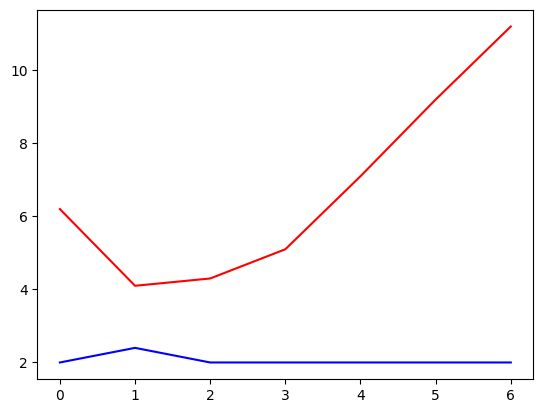

In [23]:
np.random.seed(201763)
import tracemalloc 
import time 
import matplotlib.pyplot as plt 

a_r_v = 20*(np.arange(7) + 1)

a_c_v = 20*(np.arange(7) + 1)

b_c_v = 20*(np.arange(7) + 1)

num_cases = 10

mean_v_mine= []
mean_s_mine = []
mean_v_np  = []
mean_s_np = []
mean_time_m = []
mean_time_np = []



for i in range(len(a_r_v)):
    print(f"Going for {i}")
    c_mine = []
    s_mine = []
    c_np = []
    s_np = []


    for t in range(num_cases):
        A = np.random.uniform(-10, 10, size = (a_r_v[i], a_c_v[i]))
        B = np.random.uniform(-10, 10, size = (a_c_v[i], b_c_v[i]))

        tracemalloc.start()
        C = A@B 
        np_snapshot = tracemalloc.take_snapshot()
        tracemalloc.stop()
        stats = np_snapshot.statistics('traceback')

        c_np.append(sum(stat.count for stat in stats )) #Adds total number of allocations. 
        s_np.append(sum(stat.size for stat in stats ) ) #Adds total number of bytes. 


        tracemalloc.start()
        C = multiply_matrices(A,B)
        np_snapshot = tracemalloc.take_snapshot()
        tracemalloc.stop()
        stats = np_snapshot.statistics('traceback')

        c_mine.append(sum(stat.count for stat in stats )) #Adds total number of allocations. 
        s_mine.append(sum(stat.size for stat in stats ) ) #Adds total number of bytes. 
    
    mean_v_np.append(np.mean(c_np))
    mean_s_np.append(np.mean(s_np))
    mean_v_mine.append(np.mean(c_mine))
    mean_s_mine.append(np.mean(s_mine))


plt.plot(np.arange(len(a_r_v)), mean_v_np, color = 'blue') #mean number of allocations numpy (blue)
plt.plot(np.arange(len(a_r_v)), mean_v_mine, color = 'red') #mean number of allocations mine (red)
plt.show()








It is worth asking, if both functions give exactly the same output,  **why is one much faster than the other?**


Some reasons include
1. Numpy does not execute its commands in python, but in C. This allows numpy to have a higher control over memory management. 
2. Numpy often does computation with the indices of a multidimensional array. That is, in many instances it is possible to know which operation (in our case multiplication) will involve which indices in the original matrices $A$ and $B$ and how they relate to the final output $C$.
3. Following 2., our code defines temporary variables which are modified. Often, defining temporary variables is quite costly in terms of computing time and memory allocation. We may think about it in the following way: If for each iteration of a loop (e.g. a for or a while) we define a new variable a, in each of the flops the code will re-allocate a memory spot for a, modify it and delete it. 


Thus, one of the lessons to learn is that when dealing with large scale computing, **the output isnt the only thing that matters, but how that output is obtained matters as well.** It is always crucial to remember that, something that is not well programmed will be a multiplied problem when trying to scale it. 


 Some general tips include: 

1. Whenever possible, delegate numerical tasks to specialized libraries like scipy, numpy and torch. (Our code relies heavely on the three of them).
2. Try to store things in the most efficient way possible. For example, if we are going to use matrices $A_1$, $A_2$, ..., $A_N$, all of dimension $K \times M$ it is worth to use a multidimensional array instead of $N$ individual matrices. Examples include np.ndarray's and torch tensors. i.e. 

$Matrices = [A1, A2, ..., AN]$ is going to be way less memory efficient than a $(N \times K \times M)$ np.ndarray or a torch tensor of the same dimensions. 


Libraries like torch have optimized functions for tensors of this type. 

3. When possible, pre-allocate the memory to be utilized for a particular case. Following the previous example, we may initialize a $(N \times K \times M)$ tensor and, when seeking to access a particular matrix $An$ simply call $A[n, :, :]$ or, if we were to modify a particular entry $An[i,j]$ use $A[n,i,j]$. 


4. If there are terms to be used multiple times, compute them once and call them in each iteration. For example, consider the task of computing $X_o^T T_o l_o$ where $X_o$ and $T_o$ are fixed, but $l_o$ changes per iteration. Then, calculating $A = X_o^TT_o$ and using it to calculate $A l_o$ is most likely a good way to save on computing time rather than computing $X_o^T T_o$ in each iteration. 

5. Whenever you are writting code that needs to scale, do not think on what a particular line of code gives as output, but think on the intermediary processes which need to ocurr for that output to ocurr. 

6. Whenever possible, try using theoretical properties of objects (e.g. matrices) to obtain desired outputs without using necessarely the theoretical operations. e.g. a matrix $A = diag(1, 2,3)$ multiplied by a matrix $B$ of dimension $ 3 \times L$  (AB) will result on $row_1(AB) = row_1(B) $, $row_2(AB) = 2row_2(B)$ and $row_3(AB) = 3row_3(B)$. So, it may be way more efficient to obtain $row_1(B)$, $2row_2(B)$ and $3row_3(B)$ rather than doing the entire multiplication. 










### Vectorization and parallel computing 


To understand why some torch and numpy functions are so optimized (and other functions in other programing languages like R or Julia) we must have a basic notion of what parallel computing is and how does it compare to concurrent computing. Watch the following videos:

1.  https://www.youtube.com/watch?v=q7sgzDH1cR8 
2. https://www.youtube.com/watch?v=pPStdjuYzSI
3. https://www.youtube.com/watch?v=BR3Qx9AVHZE



Now, having seen the basics of parallel computing there is an important lesson to highlight: **Doing tasks in parallel is not always worth it and, in fact, it can be counterproductive**. If a process is performed in parallel, the output of the parallel processes must be "re-collected" at some point. If parallel instructions are abused, it may ocurr that re-collecting the pieces might be more expensive than doing things with concurrent computing. 

An additional warning with parallel computing is that, **parallel computing may not be performed if there are pieces that depend on each other**. Consider the case of defining a random walk defined by 

$$ X_{n+1} = X_n + \varepsilon_n$$


with $\varepsilon_n \sim \mathcal{N}(0, X_n^2/2^n )$ it is clear that we cannot parallelize this process as a step $n+1$ depends on the step $n$ which itself depends on $n-1$ and so on. This is often the case with iterative processes like MCMC walks and iterative numerical procedures. What could be done is that, if we need $K$ random walks, we could do each walk in parallel and, within each parallel process, do the recursive definition in a concurrent fashion. i.e. each individual random walk is computed independently of the other, but all are computed at the same time in parallel. 







In [ ]:
"""
What do the slices m0_outer[o, :, :] represent? Simulate possible values for m0 and compare the two ways of obtaining m0_outer. Compare the outputs numerically, find out the way torch.bmm works, and 
explain why the individual outputs are obtained. 
"""
import torch 
import numpy as np 


O = 3
B = 6

np.random.seed(201763)

m0 = torch.zeros(O, B)

m0 = torch.from_numpy(np.random.uniform(0, 10, size = (O, B)))


#Form 1, with torch.bmm
m0_outer1 = torch.bmm(m0.unsqueeze(-1), m0.unsqueeze(-2)   )
#Form 2, naive way. Note that we are still applying the good practice of pre-allocating memory. 
m0_outer2 = torch.zeros(O, B, B) #Creates a torch tensor to store outer products of m0's. 

for o in range(O): #Gets the outer product of individual mean estimates. 
    m0_outer2[o,:,:] = m0[o,:].unsqueeze(-1)@m0[o,:].unsqueeze(-2)#Gets inner product of the o-th mean estimate.


diff = torch.abs(m0_outer1 - m0_outer2) 

print(torch.max(diff))




tensor([[[8.1271],
         [3.0432],
         [1.4977],
         [1.2124],
         [5.8332],
         [0.3984]],

        [[1.9337],
         [9.9870],
         [0.8658],
         [3.6691],
         [8.4442],
         [8.5502]],

        [[7.1806],
         [0.4623],
         [4.6823],
         [2.6555],
         [1.9176],
         [7.7613]]], dtype=torch.float64)
tensor([[[8.1271, 3.0432, 1.4977, 1.2124, 5.8332, 0.3984]],

        [[1.9337, 9.9870, 0.8658, 3.6691, 8.4442, 8.5502]],

        [[7.1806, 0.4623, 4.6823, 2.6555, 1.9176, 7.7613]]],
       dtype=torch.float64)
tensor([[[66.0503, 24.7323, 12.1718,  9.8529, 47.4075,  3.2377],
         [24.7323,  9.2609,  4.5577,  3.6894, 17.7516,  1.2124],
         [12.1718,  4.5577,  2.2430,  1.8157,  8.7363,  0.5967],
         [ 9.8529,  3.6894,  1.8157,  1.4698,  7.0719,  0.4830],
         [47.4075, 17.7516,  8.7363,  7.0719, 34.0267,  2.3239],
         [ 3.2377,  1.2124,  0.5967,  0.4830,  2.3239,  0.1587]],

        [[ 3.7393, 19.3122, 

In [2]:
import torch 
import numpy as np 

O = 5
B = 4


S = torch.zeros(O,B,B)
for o in range(O):
    S[o,:,:] = (o+2)*torch.from_numpy(np.eye(B))


Si = torch.linalg.inv(S)


print(S)
print(Si)

print(torch.bmm(S, Si))


print(S + torch.ones(B, B ))

#print(torch.bmm(S, (torch.arange(B)+1).reshape(-1,1) ))


tensor([[[2., 0., 0., 0.],
         [0., 2., 0., 0.],
         [0., 0., 2., 0.],
         [0., 0., 0., 2.]],

        [[3., 0., 0., 0.],
         [0., 3., 0., 0.],
         [0., 0., 3., 0.],
         [0., 0., 0., 3.]],

        [[4., 0., 0., 0.],
         [0., 4., 0., 0.],
         [0., 0., 4., 0.],
         [0., 0., 0., 4.]],

        [[5., 0., 0., 0.],
         [0., 5., 0., 0.],
         [0., 0., 5., 0.],
         [0., 0., 0., 5.]],

        [[6., 0., 0., 0.],
         [0., 6., 0., 0.],
         [0., 0., 6., 0.],
         [0., 0., 0., 6.]]])
tensor([[[0.5000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.5000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.5000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.5000]],

        [[0.3333, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.3333, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.3333, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.3333]],

        [[0.2500, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.2500, 0.0000, 0.0000],
         [0.0000